In [5]:
from uq_new import *
import pickle
import matplotlib.pyplot as plt
import numpy as np

Training memristor model
Initial parameters: phi1=5.474701881408691, phi3=4.244052886962891, x_2=0.12989526987075806
Loss at step 1: 49.401756286621094
Loss at step 2: 49.39175033569336
Loss at step 3: 49.38173294067383
Loss at step 4: 49.37175750732422
Loss at step 5: 49.361759185791016
Loss at step 6: 49.35178756713867
Loss at step 7: 49.34181213378906
Loss at step 8: 49.33184814453125
Loss at step 9: 49.32188034057617
Loss at step 10: 49.31193161010742
Final loss: 49.31193161010742
Optimal parameters: phi1=5.444701671600342, phi3=4.2144389152526855, x_2=0.10051281750202179
Predictions: [4.5472014e-05, 0.02808782, 0.022196664, 0.054177575, 0.08718975, 0.027662396, 0.041715905, 0.018026415, 0.00017802711, 0.00013124787, 0.0014854239, 0.028143415, 0.0037179668, 0.03611427, 0.003901184, 0.054814484, 0.011462236, 0.025123972, 0.0023505113, 0.037007812, 0.09184253, 0.070920125, 0.0026030466, 0.007615275, 0.0048827636, 0.006507388, 0.07965629, 0.036817797, 0.014830714, 0.0021206283, 0.0112

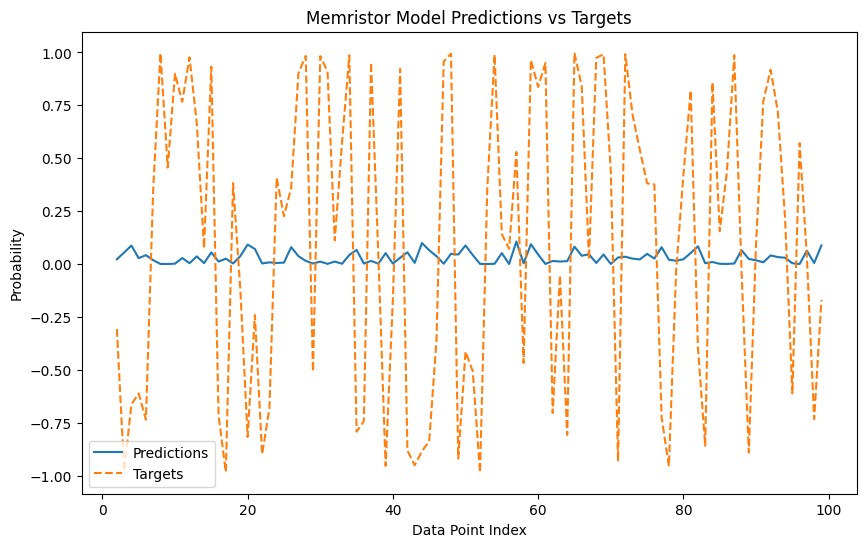

In [6]:

dip = 3  # Memory depth

# Input data
inp = np.random.random_sample(100) * 0.5  # Random values between 0 and 0.5
x_train = tf.constant(np.sqrt(inp), dtype=tf.float32)

# Train the memristor model
res_mem, phi1, phi3, x_2 = train_memristor(x_train, dip)

# Save training results
with open("results_mem_t_lag_iris.pkl", "wb") as file:
    pickle.dump(res_mem, file)

# Predict using the trained model
x_test = x_train  # For simplicity, using the same data
predictions, targets = predict_memristor(x_test, dip, phi1, phi3, x_2)

# Print predictions and targets
print("Predictions:", predictions)
print("Targets:", targets)

# Plotting
# Since targets and predictions start from index 2 (after phi >= 2), we adjust the x-axis accordingly
x_axis = np.arange(2, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(x_axis, predictions[2:], label='Predictions')
plt.plot(x_axis, targets, label='Targets', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Probability')
plt.title('Memristor Model Predictions vs Targets')
plt.legend()
plt.show()